# Entanglement in qubits

created by M. Y. Hanna [muha207(at)brin.go.id]()

---

### Entanglement (Bell State)

Two quantum systems are said to be entangled when the values of certain properties of one system are non-classically correlated with the values the same properties will assume for the other system.

Let's get started with one of the simplest examples of entangled states, known as the Bell State. The general form of a **Bell State** is:

$$
|\beta_{xy} \rangle = \frac{|0y\rangle + (-1)^{x}|1 \bar{y}\rangle}{\sqrt{2}}
$$

The $x$ and $y$ are called the *phase bit* and *parity bit*, respectively. Consider one of the Bell states: 

$$| \beta_{01} \rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$$

### Create a Bell state using simple circuit

In [1]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector

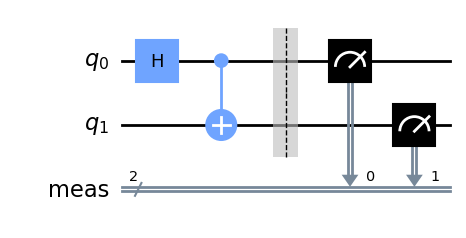

In [2]:
bell = QuantumCircuit(2)

bell.h(0)
bell.cx(0,1)
bell.measure_all()
bell.draw('mpl', style="clifford")

### Simulate using local computer

In [3]:
def simulator(qc, sampling):
    backend_qasm = Aer.get_backend('qasm_simulator')
    # Run the circuit and get the result
    result = execute(qc, backend_qasm, shots=sampling).result()
    return result.get_counts()

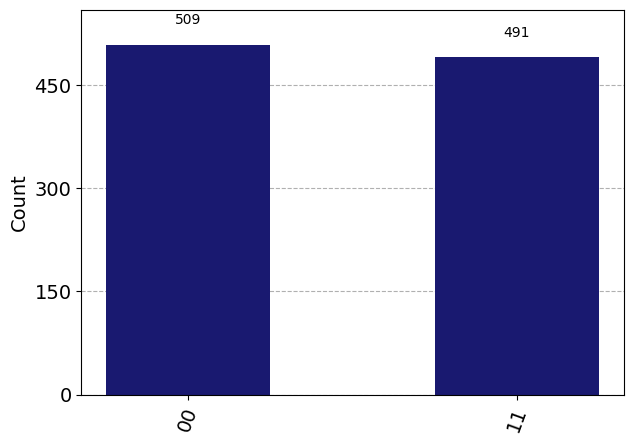

In [4]:
plot_histogram(simulator(bell, 1000), color='midnightblue')

### Connect with the IBMQ

Before connecting our computer to IBM's quantum computing for realistic simulations, please register first by clicking on "Create an IBMid account" using the following link: [https://quantum.ibm.com/](https://quantum.ibm.com/).

![IBMid](../imag/IBMid.png)

After registering your IBM account, please copy the API token to access IBM Quantum from your computer as follow

![API Token](../imag/Token.png)

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
from qiskit.tools import job_monitor
import time

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Read the token from a file
with open('./IBMQ_token.dat', 'r') as file:
    token = file.read().strip()

# Use the token to save the account
QiskitRuntimeService.save_account(channel='ibm_quantum', token=token, overwrite=True)

In [7]:
service = QiskitRuntimeService(instance='ibm-q/open/main')
backends = service.backends()
#backends = service.backends(simulator=False, min_num_qubits=5)
print(backends)

[<IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibmq_qasm_simulator')>]


To access an actual quantum processing unit (QPU) as a backend, please visit this link for more detailed information about QPUs: [https://quantum.ibm.com/services/resources](https://quantum.ibm.com/services/resources). In this example, we try to use the `ibm_brisbane` as QPU

![IBM_Brisbane](../imag/ibm_brisbane.png)

and with the calibration readout error as shown in figure below

![Brisbane_error](../imag/ibm_brisbane_calibrations_readout_error.png)

#### Submit job into IBMQ

In [ ]:
backend = service.get_backend('ibm_brisbane')

with Session(service=service, backend=backend) as session:
    sampler = Sampler()
    job = sampler.run(circuits=bell)
    
    # Monitor the job status
    while job.status() not in ['DONE', 'CANCELLED', 'ERROR']:
        print('Job Status:', job.status())
        time.sleep(10)  # wait for 10 seconds before checking the status again

For more detail about job, we can visit this link [https://quantum.ibm.com/jobs](https://quantum.ibm.com/jobs)

![QUEUED](../imag/job_IBM.png)

In [ ]:
job.job_id()

In [ ]:
print(job.logs())

In [ ]:
plot_histogram(job.result().quasi_dists[0].binary_probabilities())

### Connect with the IBMQ (Alternative)

#### Fake Provider

[The fake provider module](https://docs.quantum.ibm.com/api/qiskit/providers_fake_provider) contains fake providers and fake backends classes. The fake backends are built to mimic the behaviors of IBM Quantum systems using system snapshots. The system snapshots contain important information about the quantum system such as coupling map, basis gates, qubit properties (T1, T2, error rate, etc.) which are useful for testing the transpiler and performing noisy simulation of the system.

In [8]:
from qiskit.providers.fake_provider import FakeWashingtonV2

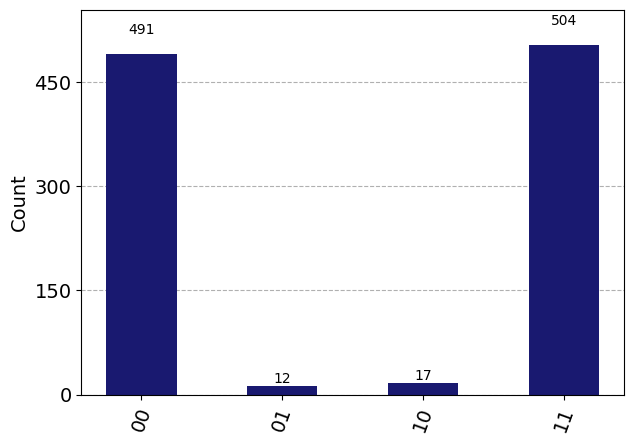

In [9]:
def run_QPU(qc, sampling):
    fake_backend = FakeWashingtonV2()
    job = execute(qc, fake_backend, shot=sampling)
    counts = job.result().get_counts()
    return counts

plot_histogram(run_QPU(bell, 1000), color='midnightblue')

Here we observe that the states $|00\rangle$ and $|11\rangle$ have nearly equal probabilities, whereas the states ($|10\rangle$, $|01\rangle$) should not exist according to theoretical considerations, but do exist due to unavoidable quantum noise.

The qubits’ collective state cannot be expressed as two discrete qubits. As mentioned earlier, the measurement of one qubit at state $|0\rangle$ leads to the collapse of the collective system to state $|00\rangle$. 

### Greenberger–Horne–Zeilinger state

In the field of quantum physics, specifically in quantum information theory, a GHZ state, named after Greenberger, Horne, and Zeilinger, is a special kind of connected quantum state that requires a minimum of three parts, like particle states, qubits, or qudits.

In [10]:
def ghz_state(num_qubits):
    '''
    Create a quantum circuit with the specified number of qubits
    '''
    ghz_circuit = QuantumCircuit(num_qubits)

    # Apply a Hadamard gate to the first qubit
    ghz_circuit.h(0)

    # Apply a series of CNOT gates
    for i in range(num_qubits - 1):
        ghz_circuit.cx(i, i + 1)
    ghz_circuit.measure_all()

    return ghz_circuit

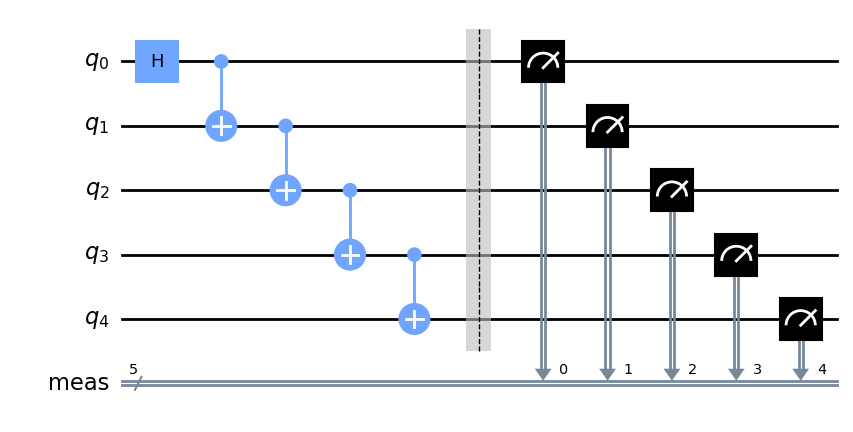

In [11]:
ghz_state(5).draw('mpl')

#### Run into local computer

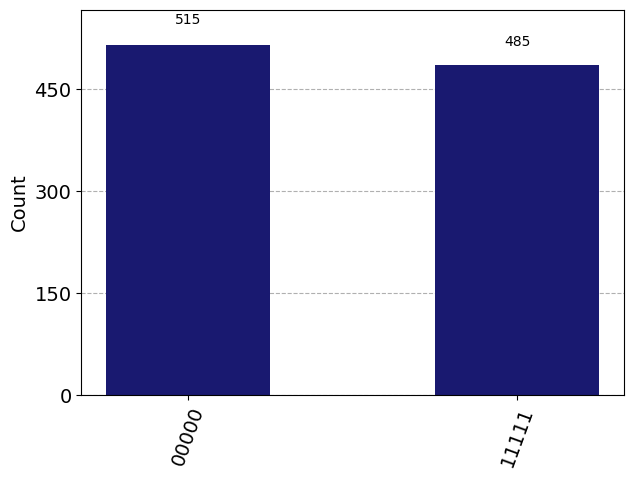

In [12]:
plot_histogram(simulator(ghz_state(5), 1000), color='midnightblue')

#### Run into QPU via Fake Provider

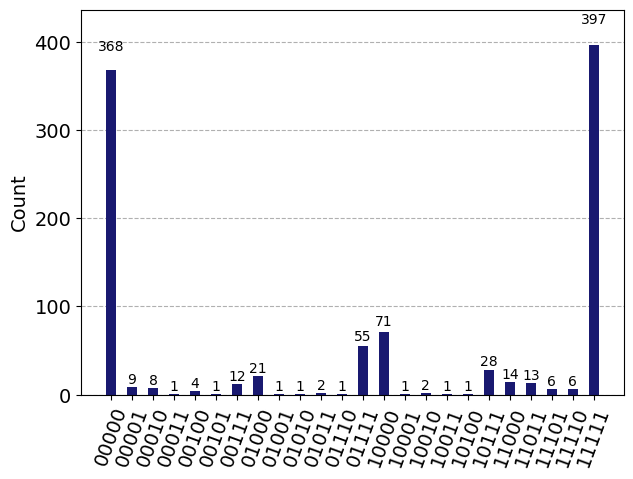

In [13]:
plot_histogram(run_QPU(ghz_state(5), 1000), color='midnightblue')

## [W state](https://en.wikipedia.org/wiki/W_state)

The $W$ state is a special way three quantum bits (qubits) are connected or 'entangled.' Imagine each qubit like a tiny, super-advanced computer bit. In this state, they are linked in a unique pattern that can be described using a mathematical formula. This pattern is important because it shows a special kind of connection between the qubits that is useful in advanced quantum computing. It's like having three players in a game, each holding a bit of shared information that they can't reveal entirely. This state helps us understand a rule in quantum physics called Bell's theorem. This theorem says that quantum mechanics (the science of super small particles) works in a way that can't be explained by simpler, classical ideas. The $W$ state was first described by Wolfgang Dür, Guifré Vidal, and Ignacio Cirac in 2002.

$$
| W \rangle = \frac{1}{\sqrt{3}} \left(|001\rangle + |010\rangle + |100\rangle \right)
$$



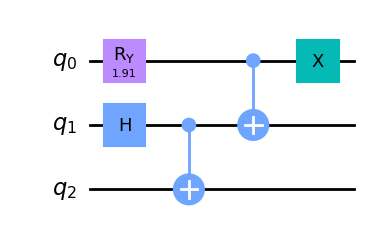

In [14]:
import math

# Create a quantum circuit with 3 qubits
W_qc = QuantumCircuit(3)

# Rotation angle to create superposition for W state
phi_3 = 2 * math.acos(1 / math.sqrt(3))

# Apply rotation around the Y-axis on the first qubit
W_qc.ry(phi_3, 0)
# Apply the Hadamard gate on the second qubit
W_qc.h(1)
# Apply CNOT gate with the second qubit as control and the third qubit as target
W_qc.cx(1, 2)
# Apply CNOT gate with the first qubit as control and the second qubit as target
W_qc.cx(0, 1)
# Apply Pauli-X gate on the first qubit
W_qc.x(0)

# To visualize the circuit you can use qc.draw()
W_qc.draw('mpl')

In [15]:
# Display the statevector in Latex
from qiskit.visualization import array_to_latex

def statevector(qc, display_latex=True):
    '''Calculates the statevector of a quantum circuit'''
    # Set the backend to the statevector simulator
    backend = Aer.get_backend('statevector_simulator')
    # Execute the circuit and get the result
    job = execute(qc, backend)
    result = job.result()
    # Get the statevector from the result
    final_state = result.get_statevector(qc)
    if display_latex:
        # Convert the Statevector object to a numpy array and reshape it to a column vector
        column_statevector = np.reshape(final_state.data, (len(final_state.data), 1))
        # Display the statevector as a column vector in LaTeX format
        return array_to_latex(column_statevector, prefix="\\text{Statevector} = ")
    else:
        return final_state

In [16]:
statevector(W_qc, display_latex=True)

<IPython.core.display.Latex object>

In [17]:
statevector(W_qc, display_latex=False).draw('latex')

<IPython.core.display.Latex object>

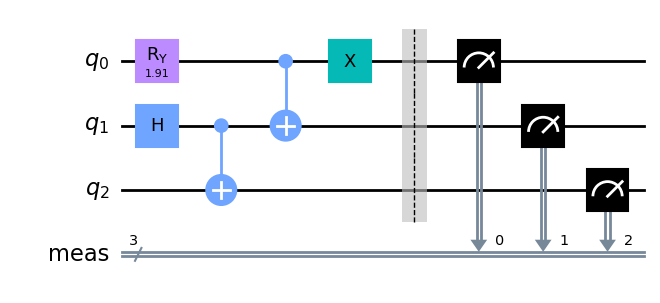

In [18]:
W_qc.measure_all()
W_qc.draw('mpl')

#### Run ideal case

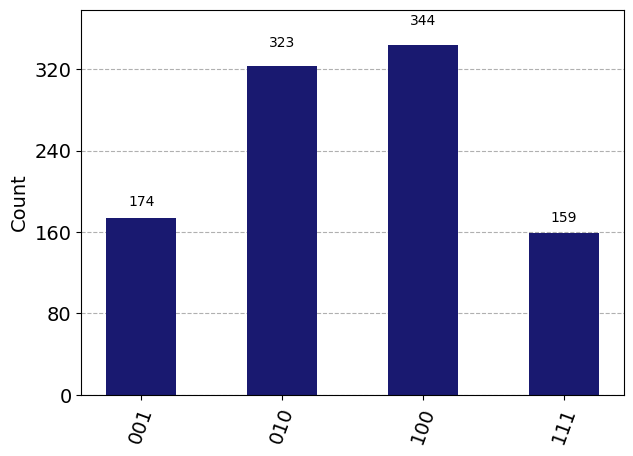

In [19]:
plot_histogram(simulator(W_qc, 1000), color='midnightblue')

#### Run into QPU 

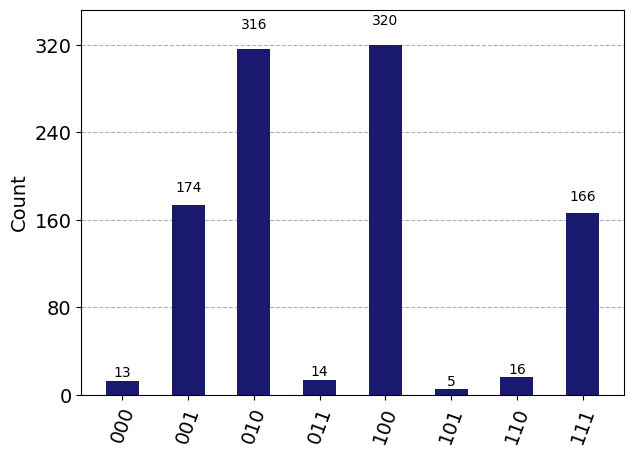

In [20]:
plot_histogram(run_QPU(W_qc, 1000), color='midnightblue')